In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [60]:
data=pd.read_csv("C:/Users/tomar/OneDrive/My folder 1/Courses/RFM/Online Retail.csv",encoding="ISO-8859-1")

In [61]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [62]:
data['Total_Price']=data['Quantity']*data['UnitPrice']
data['date']=data['InvoiceDate'].str.extract('(.*)/').str.extract('(.*)/')
data['date']=data.date.astype(str).str.zfill(2)
data['date']=data['InvoiceDate'].str.extract('/(.*) ').str.extract('/(.*)') + data['date']
data.date = pd.to_numeric(data.date, errors='coerce')

C:\Users\tomar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\tomar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [63]:
Cust=data[['CustomerID']].drop_duplicates()
print ("No of customers are :" , len(Cust))
Cust_country=data[['Country','CustomerID']].drop_duplicates()
Cust_freq=data[['Country','InvoiceNo','CustomerID']].drop_duplicates()

No of customers are : 4373


In [64]:
Cust_country_count=Cust_country.groupby(["Country"])["CustomerID"].aggregate("count").\
reset_index().sort_values(by='CustomerID', ascending=False)

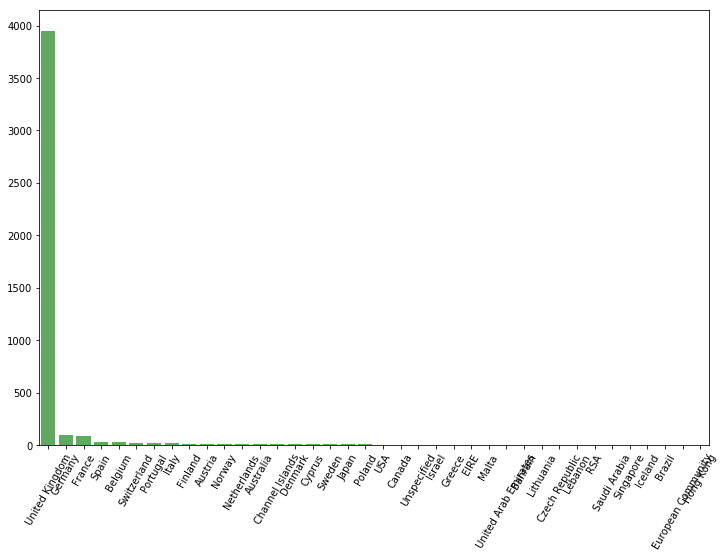

In [65]:
country=list(Cust_country_count['Country'])
Cust_id=list(Cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, Cust_id, alpha=0.8, color=color[2])
plt.xticks(rotation='60')
plt.show()

In [66]:
Cust_freq=data[['Country','InvoiceNo','CustomerID']].drop_duplicates()
Cust_freq_count = Cust_freq.groupby(["Country","CustomerID"])["InvoiceNo"].aggregate("count").\
reset_index().sort_values(by='InvoiceNo', ascending=False)
Cust_freq_count_UK=Cust_freq_count[Cust_freq_count['Country']=="United Kingdom"]
unique_invoice=Cust_freq_count_UK[['InvoiceNo']].drop_duplicates()
unique_invoice['Frequency_Band'] = pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Frequency_Band']].drop_duplicates()
unique_invoice

,Frequency_Band
428,"(55.0, 224.0]"
2017,"(38.0, 55.0]"
2031,"(25.0, 38.0]"
4057,"(13.0, 25.0]"
2856,"(0.999, 13.0]"


In [67]:
def f(row):
    if row['InvoiceNo'] <= 13:
        val = 1
    elif row['InvoiceNo'] > 13 and row['InvoiceNo'] <= 25:
        val = 2
    elif row['InvoiceNo'] > 25 and row['InvoiceNo'] <= 38:
        val = 3
    elif row['InvoiceNo'] > 38 and row['InvoiceNo'] <= 55:
        val = 4
    else:
        val = 5
    return val

In [68]:
Cust_freq_count_UK['Freq_Flag'] = Cust_freq_count_UK.apply(f, axis=1)

C:\Users\tomar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


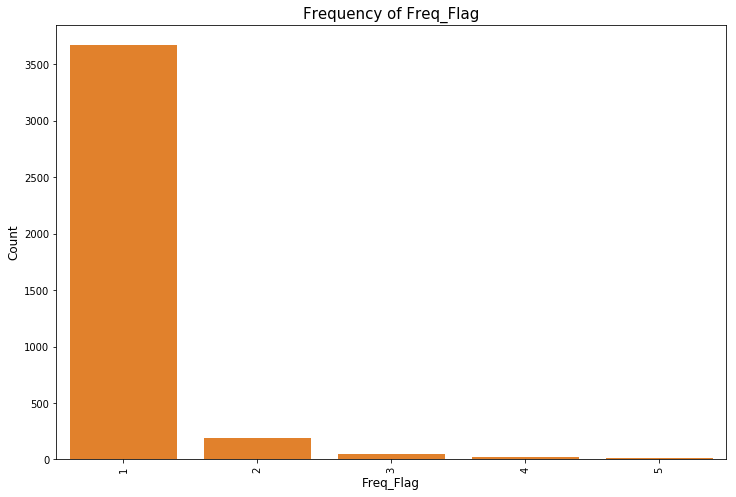

In [69]:
plt.figure(figsize=(12,8))
sns.countplot(x="Freq_Flag", data=Cust_freq_count_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Freq_Flag", fontsize=15)
plt.show()

In [70]:
Cust_monetory = data.groupby(["Country","CustomerID"])["Total_Price"].aggregate("sum").\
reset_index().sort_values(by='Total_Price', ascending=False)
Cust_monetory_UK=Cust_monetory[Cust_monetory['Country']=="United Kingdom"]

In [71]:
unique_price=Cust_monetory_UK[['Total_Price']].drop_duplicates()
unique_price=unique_price[unique_price['Total_Price'] > 0]
unique_price['monetory_Band'] = pd.qcut(unique_price['Total_Price'], 5)
unique_price=unique_price[['monetory_Band']].drop_duplicates()
unique_price

,monetory_Band
4237,"(1932.504, 256438.49]"
1959,"(892.136, 1932.504]"
930,"(463.248, 892.136]"
1877,"(243.046, 463.248]"
2879,"(-0.0009999999999876, 243.046]"


In [72]:
def f(row):
    if row['Total_Price'] <= 243:
        val = 1
    elif row['Total_Price'] > 243 and row['Total_Price'] <= 463:
        val = 2
    elif row['Total_Price'] > 463 and row['Total_Price'] <= 892:
        val = 3
    elif row['Total_Price'] > 892 and row['Total_Price'] <= 1932:
        val = 4
    else:
        val = 5
    return val

In [73]:
Cust_monetory_UK['Monetory_Flag'] = Cust_monetory_UK.apply(f, axis=1)

C:\Users\tomar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


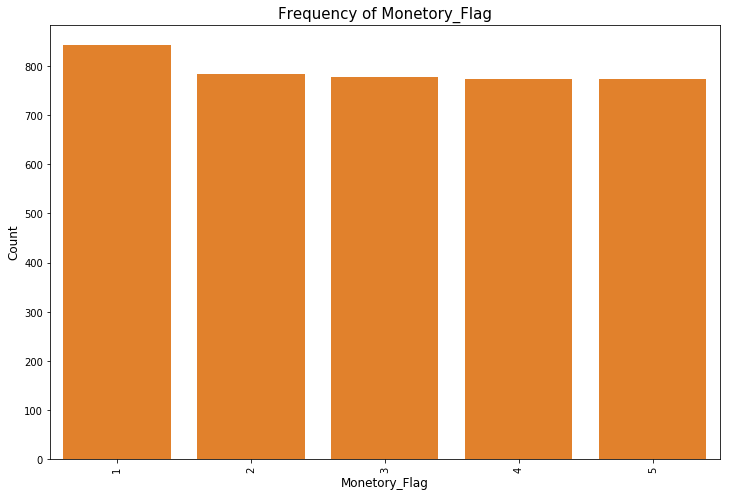

In [74]:
plt.figure(figsize=(12,8))
sns.countplot(x="Monetory_Flag", data=Cust_monetory_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetory_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Monetory_Flag", fontsize=15)
plt.show()

In [75]:
Cust_date_UK=data[data['Country']=="United Kingdom"]
Cust_date_UK=Cust_date_UK[['CustomerID','date']].drop_duplicates()

In [76]:
def f(row):
    if row['date'] > 201110:
        val = 1
    elif row['date'] <= 201110 and row['date'] > 201108:
        val = 2
    elif row['date'] <= 201108 and row['date'] > 201106:
        val = 3
    elif row['date'] <= 201106 and row['date'] > 201104:
        val = 4
    else:
        val = 5
    return val

In [77]:
Cust_date_UK['Recency_Flag'] = Cust_date_UK.apply(f, axis=1)
Cust_date_UK = Cust_date_UK.groupby("CustomerID", as_index=False)["Recency_Flag"].max()

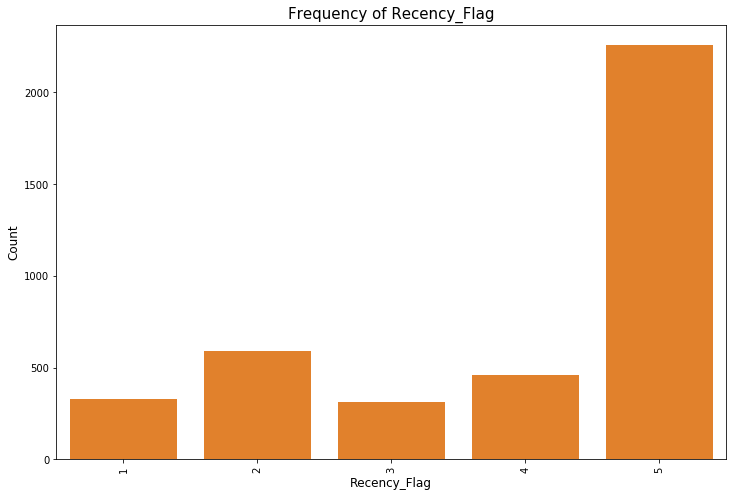

In [78]:
plt.figure(figsize=(12,8))
sns.countplot(x="Recency_Flag", data=Cust_date_UK, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Recency_Flag", fontsize=15)
plt.show()

In [79]:
Cust_UK_All=pd.merge(Cust_date_UK,Cust_freq_count_UK[['CustomerID','Freq_Flag']],\
                     on=['CustomerID'],how='left')
Cust_UK_All=pd.merge(Cust_UK_All,Cust_monetory_UK[['CustomerID','Monetory_Flag']],\
                     on=['CustomerID'],how='left')
Cust_UK_All.head(10)

,CustomerID,Recency_Flag,Freq_Flag,Monetory_Flag
0,12346.0,5,1,1
1,12747.0,5,1,5
2,12748.0,5,5,5
3,12749.0,4,1,5
4,12820.0,5,1,4
5,12821.0,4,1,1
6,12822.0,2,1,4
7,12823.0,5,1,4
8,12824.0,2,1,2
9,12826.0,5,1,4
